In [1]:
# autocompletation
%config Completer.use_jedi = False

import math

# sympy
from sympy import *
from sympy import Matrix,Symbol,cos,pi,sin,sqrt,exp,simplify
from sympy.physics.quantum.dagger import Dagger
from sympy.abc import alpha,beta,gamma,delta
from sympy.physics.quantum import TensorProduct

theta=Symbol('theta',real=True)
phi=Symbol('phi',real=True)

In [2]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter,ParameterVector
import qiskit.tools.jupyter 
%qiskit_version_table

# Unitary Implementation

## Elementary quantum gates

### Single Qubit Gates


$I=\begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}, \quad$ $X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}, \quad$ $Y=\begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}, \quad$ $Z=\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}, \quad$ $H=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}, \quad$ $S=\begin{pmatrix} 1 & 0 \\ 0 & i \end{pmatrix}, \quad$

In [3]:
# Paulis
Id=Matrix([[1,0],[0,1]])
PauliX=Matrix([[0,1],[1,0]])
PauliY=Matrix([[0,-I],[I,0]])
PauliZ=Matrix([[1,0],[0,-1]])
H=Matrix([[1,1],[1,-1]])/sqrt(2)
S=Matrix([[1,0],[0,I]])

#### $R_x$ rotation

$R_x(\theta)=\begin{pmatrix}\cos(\frac{\theta}{2}) & -i \sin(\frac{\theta}{2}) \\ -i\sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{pmatrix} $

In [4]:
# Rx rotation
Rx=Matrix([[cos(theta/2),-I*sin(theta/2)],[-I*sin(theta/2),cos(theta/2)]])
Rx

Matrix([
[   cos(theta/2), -I*sin(theta/2)],
[-I*sin(theta/2),    cos(theta/2)]])

#### $R_y$ rotation

$R_y(\theta)=\begin{pmatrix}\cos(\frac{\theta}{2}) & -\sin(\frac{\theta}{2}) \\ \sin(\frac{\theta}{2}) & \cos(\frac{\theta}{2})\end{pmatrix} $

In [5]:
# Ry rotation
Ry=Matrix([[cos(theta/2),-sin(theta/2)],[sin(theta/2),cos(theta/2)]])
Ry

Matrix([
[cos(theta/2), -sin(theta/2)],
[sin(theta/2),  cos(theta/2)]])

#### $R_z$ rotation

$R_z(\theta)=\begin{pmatrix} e^{-i\theta/2} & 0 \\ 0 & e^{i\theta/2}\end{pmatrix} $

In [6]:
# Rz rotation
Rz=Matrix([[exp(-I*theta/2),0],[0,exp(I*theta/2)]])
Rz

Matrix([
[exp(-I*theta/2),              0],
[              0, exp(I*theta/2)]])

### Multiple Qubit Gates

#### CNOT Gate

CNOT = $\begin{pmatrix}
1 &0  &0  &0 \\ 
 0&  1&  0& 0\\ 
 0& 0 &0  &1 \\ 
 0& 0 & 1 &0 
\end{pmatrix}, \,$  flip target qubit when controled qubit is 1

In [7]:
CNOT=Matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]])
CNOT

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 0, 1],
[0, 0, 1, 0]])

## Example -1

<b> H </b> $=Z_1 \otimes Z_2$, we want implement  $e^{-i \frac{\theta}{2} (Z_1 \otimes Z_2)}$ on quantum computer  
First, direct multiply the matrix and we can see:

In [8]:
ex1_ans=exp(-I*theta/2*TensorProduct(PauliZ,PauliZ))
ex1_ans

Matrix([
[exp(-I*theta/2),              0,              0,               0],
[              0, exp(I*theta/2),              0,               0],
[              0,              0, exp(I*theta/2),               0],
[              0,              0,              0, exp(-I*theta/2)]])

First, we know that   

1. $Z|f\rangle=(-1)^f|f\rangle$   

2. $e^Z|f \rangle=e^{(-1)^f}|f\rangle$  

$ \implies e^{-i \frac{\theta}{2} (Z_1 \otimes Z_2)} |f_1,f_2 \rangle=e^{-i \frac{\theta}{2} (-1)^{f_1\oplus f_2}} |f_1,f_2 \rangle$

3. $R_z(\theta)|f\rangle = e^{-i \frac{\theta}{2} (-1)^f}| f\rangle$

## Quantum Circuit Implementation

### CNOT  ($I_0 \otimes R_{z_1}(\theta)$)  CNOT

$|f_1,f_2 \rangle \implies |f_1,f_1 \oplus f_2 \rangle \implies e^{-i\frac{\theta}{2} (-1)^{f_1 \otimes f_2}} \; |f_1,f_1 \oplus f_2 \rangle \implies e^{-i\frac{\theta}{2} (-1)^{f_1 \otimes f_2}} \;|f_1,f_2 \rangle $

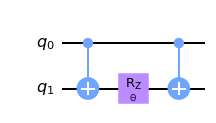

In [9]:
t=Parameter('$\Theta$')
ex1circ=QuantumCircuit(2)
ex1circ.cx(0,1)
ex1circ.rz(t,1)
ex1circ.cx(0,1)
ex1circ.draw('mpl')

$e^{-i \frac{\theta}{2} (-1)^{f_1\oplus f_2}} \; |f_1,f_2 \rangle = (CNOT_{0,1}) \, I_0 \otimes R_{z_1}(\theta) \,(CNOT_{0,1})$

In [10]:
circex1_ans=CNOT*TensorProduct(Id,Rz)*CNOT
print("Equal? ",circex1_ans==ex1_ans)
circex1_ans

Equal?  True


Matrix([
[exp(-I*theta/2),              0,              0,               0],
[              0, exp(I*theta/2),              0,               0],
[              0,              0, exp(I*theta/2),               0],
[              0,              0,              0, exp(-I*theta/2)]])

## Example - 2

<b> H </b> $=Z_1\otimes Z_2 \otimes Z_3$, we want implement  $e^{-i \frac{\theta}{2} (Z_1 \otimes Z_2 \otimes Z_3)}$ on quantum computer  

Matrix Multiplication

In [11]:
ex2_ans=exp(-I*theta/2*TensorProduct(PauliZ,TensorProduct(PauliZ,PauliZ)))
ex2_ans

Matrix([
[exp(-I*theta/2),              0,              0,               0,              0,               0,               0,              0],
[              0, exp(I*theta/2),              0,               0,              0,               0,               0,              0],
[              0,              0, exp(I*theta/2),               0,              0,               0,               0,              0],
[              0,              0,              0, exp(-I*theta/2),              0,               0,               0,              0],
[              0,              0,              0,               0, exp(I*theta/2),               0,               0,              0],
[              0,              0,              0,               0,              0, exp(-I*theta/2),               0,              0],
[              0,              0,              0,               0,              0,               0, exp(-I*theta/2),              0],
[              0,              0,              0,    

Quantum Circuit

$(CNOT_{0,1}\otimes I_2) \, (I_0\otimes CNOT_{1,2})\, (I_0 \otimes I_1 \otimes R_{z2}(\theta)) \,(I_0\otimes CNOT_{1,2}) \,(CNOT_{0,1}\otimes I_2) $

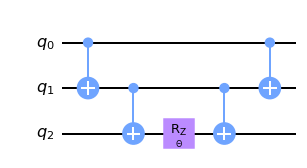

In [12]:
t=Parameter('$\Theta$')
ex2circ=QuantumCircuit(3)
ex2circ.cx(0,1)
ex2circ.cx(1,2)
ex2circ.rz(t,2)
ex2circ.cx(1,2)
ex2circ.cx(0,1)
ex2circ.draw('mpl')

In [13]:
circex2_ans=TensorProduct(CNOT,Id)*TensorProduct(Id,CNOT)*TensorProduct(TensorProduct(Id,Id),Rz)*TensorProduct(Id,CNOT)*TensorProduct(CNOT,Id)
print("Equal? ",circex2_ans==ex2_ans)
circex2_ans

Equal?  True


Matrix([
[exp(-I*theta/2),              0,              0,               0,              0,               0,               0,              0],
[              0, exp(I*theta/2),              0,               0,              0,               0,               0,              0],
[              0,              0, exp(I*theta/2),               0,              0,               0,               0,              0],
[              0,              0,              0, exp(-I*theta/2),              0,               0,               0,              0],
[              0,              0,              0,               0, exp(I*theta/2),               0,               0,              0],
[              0,              0,              0,               0,              0, exp(-I*theta/2),               0,              0],
[              0,              0,              0,               0,              0,               0, exp(-I*theta/2),              0],
[              0,              0,              0,    

# Example - 2 

<b> H </b> $=X_1\otimes Y_2 \otimes Z_3$

#### Some Math
Tensor product property: $(A \otimes B )( C\otimes D)= (AC\otimes BD)$  
Circuit identities:   
1. $HXH=Z$  also we can use $R_y(-\frac{\pi}{2})XR_y(\frac{\pi}{2})=Z$,  note that $R_y(\frac{\pi}{2})^\dagger=R_y(-\frac{\pi}{2})$

In [14]:
H*PauliX*H

Matrix([
[1,  0],
[0, -1]])

In [15]:
# Dagger(Ry_plus)=Ry_minus
Ry_plus=Ry.subs({theta:pi/2})
Ry_minus=Ry.subs({theta:-pi/2})
print("Matrix = Z ?",Ry_minus*PauliX*Ry_plus==PauliZ)
Ry_minus*PauliX*Ry_plus

Matrix = Z ? True


Matrix([
[1,  0],
[0, -1]])

2. $R_x(\pi/2)YR_x(-\pi/2)=Z$, note that $R_x(\frac{\pi}{2})^\dagger=R_x(-\frac{\pi}{2})$

In [16]:
# Rx(pi/2) Dagger(Rx_plus)=Rx_minus
Rx_plus=Rx.subs({theta:pi/2})
Rx_minus=Rx.subs({theta:-pi/2})

In [17]:
identity2=Rx_plus*PauliY*Rx_minus
identity2

Matrix([
[1,  0],
[0, -1]])

3. $(A_1 \otimes B_1 \otimes C_1) (A_2 \otimes B_2 \otimes C_2) (A_3 \otimes B_3 \otimes C_3)$

   $ \quad =(A_1A_2A_3 \otimes B_1 B_2 B_3 \otimes C_1 C_2 C_3)$

#### Now we can rewrite Hamiltonian as following:

<b> H </b> $=X_1 \otimes Y_2 \otimes Z_3 = (HZ_1H) \otimes (R_{x}(-\frac{\pi}{2}) Z_2 R_{x}(\frac{\pi}{2}) )\otimes IZ_3I $

$ =(H \otimes R_{x}(-\frac{\pi}{2}) \otimes I)\, (Z_1\otimes Z_2 \otimes Z_3)\, (H \otimes R_{x}(\frac{\pi}{2}) \otimes I)$

Then:  $e^{-i \frac{\theta}{2} (X_1 \otimes Y_2 \otimes Z_3)}$ can be implemented as:

In [18]:
ex3_ans=exp(-I*theta/2*TensorProduct(PauliX,TensorProduct(PauliY,PauliZ)))
ex3_ans

Matrix([
[cos(theta/2),             0,             0,            0,            0,             0, -sin(theta/2),            0],
[           0,  cos(theta/2),             0,            0,            0,             0,             0, sin(theta/2)],
[           0,             0,  cos(theta/2),            0, sin(theta/2),             0,             0,            0],
[           0,             0,             0, cos(theta/2),            0, -sin(theta/2),             0,            0],
[           0,             0, -sin(theta/2),            0, cos(theta/2),             0,             0,            0],
[           0,             0,             0, sin(theta/2),            0,  cos(theta/2),             0,            0],
[sin(theta/2),             0,             0,            0,            0,             0,  cos(theta/2),            0],
[           0, -sin(theta/2),             0,            0,            0,             0,             0, cos(theta/2)]])

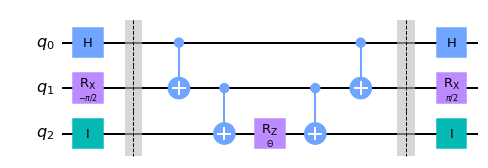

In [19]:
t=Parameter('$\Theta$')
ex3circ=QuantumCircuit(3)
ex3circ.h(0)
ex3circ.rx(-math.pi/2,1)
ex3circ.id(2)
ex3circ.barrier()
ex3circ.cx(0,1)
ex3circ.cx(1,2)
ex3circ.rz(t,2)
ex3circ.cx(1,2)
ex3circ.cx(0,1)
ex3circ.barrier()
ex3circ.rx(math.pi/2,1)
ex3circ.h(0)
ex3circ.id(2)
ex3circ.draw('mpl')

In [20]:
circex3_ans=simplify(TensorProduct(TensorProduct(H,Rx_minus),Id)*circex2_ans*TensorProduct(TensorProduct(H,Rx_plus),Id))
print("Equal ? ",circex3_ans==ex3_ans)

Equal ?  True


# Measurement : Calculating the expectation value of target Hamiltonian 

Given Hamiltonian <b> H </b> and the state $|\psi\rangle$, how to caculate expectation value of <b> H </b>  
i.e   $\quad \langle\psi|$<b> H </b> $|\psi\rangle= \sum_j a_j |\langle \psi|\phi_j\rangle|^2$, where $\phi_j$ is eigenvector with corresponding eigenvalue $a_j$

For Pauli-terms Hamiltonian , $\quad \langle \psi|$<b> H </b> $|\psi\rangle= \sum_j a_j |\langle \psi|\phi_j\rangle|^2 =(\langle \psi|\phi_{+}\rangle)^2-(\langle \psi|\phi_{-}\rangle)^2 $

A single qubit can written as $|\psi \rangle =\alpha |0 \rangle + \beta |1\rangle$, with $|\alpha|^2+|\beta|^2=1$, a convenient representation is $\alpha= \cos(\frac{\theta}{2}), \quad \beta = e^{i\phi}\sin(\frac{\theta}{2})$ 

$|\psi \rangle= \cos(\frac{\theta}{2})|0\rangle + e^{i\phi}\sin(\frac{\theta}{2})|1\rangle $

In [21]:
psi=Matrix([[cos(theta/2)],[sin(theta/2)*exp(I*phi)]])
psi

Matrix([
[           cos(theta/2)],
[exp(I*phi)*sin(theta/2)]])

### Example 4 

<b> H </b>$=Z=\begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix}, \quad $ with $|\psi \rangle=\begin{pmatrix} \alpha \\ \beta \end{pmatrix}$, 

$\langle \psi|$ <b> H </b>$|\psi \rangle=\begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} 1 & 0 \\ 0 & -1\end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} \alpha \\ -\beta \end{pmatrix} =\alpha^*\alpha -\beta^*\beta =|\alpha|^2-|\beta|^2 = \cos^2(\frac{\theta}{2})-\sin^2(\frac{\theta}{2})$  
That is : Probability of measuring the system to be in state $|0 \rangle$(even) - Probability of measuring the system to be in state $|1 \rangle$(odd) :  
$P(0)-P(1)$ = $P(even)-P(odd)$

In [22]:
Dagger(psi)*PauliZ*psi

Matrix([[-sin(theta/2)**2 + cos(theta/2)**2]])

Remember for Pauli-Z, its eigenvalue and corresponding eigenvector is : $+1:|\phi_{z+} \rangle=  \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0 \rangle, \quad -1:|\phi_{z-} \rangle=\begin{pmatrix} 0 \\ 1 \end{pmatrix} =|1 \rangle $

Hence $\quad \langle \psi|$<b> Z </b>$|\psi \rangle =$ $\sum_j a_j |\langle \psi|\phi_{j_z}\rangle|^2 =|\langle \psi|\phi_{z+}\rangle|^2-|\langle \psi|\phi_{z-}\rangle|^2=|\langle \psi|0 \rangle|^2-|\langle \psi|1\rangle|^2 $

we can directly use z-measurement to estimate expectation value

In [23]:
tq=ParameterVector(name='theta',length=3)

/home/hcl/anaconda3/envs/newQ/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  


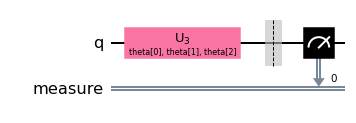

In [24]:
measure_z=QuantumCircuit(1)
measure_z.u3(tq[0],tq[1],tq[2],0)
measure_z.measure_active()
measure_z.draw('mpl')

### Example 5

<b> H <b> $=X=\begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix}, \quad $ with $|\psi \rangle=\begin{pmatrix} \alpha \\ \beta \end{pmatrix}$

$\langle \psi|$ <b> H </b>$|\psi \rangle=\begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} 0 & 1 \\ 1 & 0\end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} \beta \\ \alpha \end{pmatrix} =\alpha^*\beta -\beta^*\alpha = \sin(\theta) \cos(\phi)$  


How to implement on quantum computer? remember for X the corresponding eigenvalue and eigenvector is:

$+1:|\phi_{x+} \rangle= \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = H|0 \rangle, \quad -1:|\phi_{x-} \rangle=\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} =H|1 \rangle $

Since $\quad  \langle \psi|X|\psi \rangle= \sum_j a_j |\langle \psi|\phi_{j_x} \rangle|^2 =\sum_j a_j |\langle\psi|I|\phi_{j_x} \rangle|^2=\sum_j a_j |\langle\psi|HH|\phi_{j_x} \rangle|^2$ 

rewrite the above equation and we can get $\quad \langle \psi|$<b>X<b>$| \psi \rangle=\sum_j a_j |\langle \psi|HH|\phi_{j_x}\rangle|^2 = |\langle H \psi|0 \rangle|^2-|\langle H \psi|1\rangle|^2 $

That is: Before measurement, apply hadamard gate on corresponding qubit!

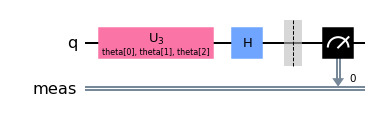

In [25]:
measure_x=QuantumCircuit(1)
measure_x.u3(tq[0],tq[1],tq[2],0)
measure_x.h(0)
measure_x.measure_all()
measure_x.draw('mpl')

In [26]:
simplify((abs(H*psi)[0])**2-abs((H*psi)[1])**2)

sin(theta)*cos(phi)

In [27]:
simplify((abs(Ry_minus*psi)[0])**2-abs((Ry_minus*psi)[1])**2)

sin(theta)*cos(phi)

### Example 6

<b> H <b>$=Y=\begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix}, \quad $ with $|\psi \rangle=\begin{pmatrix} \alpha \\ \beta \end{pmatrix}$, for single qubit, a convenient representation is $\alpha= \cos(\frac{\theta}{2}), \quad \beta = e^{i\phi}\sin(\frac{\theta}{2})$ 

$ \langle \psi|Y|\psi \rangle=\begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} 0 & -i \\ i & 0\end{pmatrix} \begin{pmatrix} \alpha \\ \beta \end{pmatrix} = \begin{pmatrix} \alpha^* & \beta^* \end{pmatrix} \begin{pmatrix} -\beta i \\ \alpha i \end{pmatrix} = - i \alpha^*\beta + i\beta^*\alpha = \sin(\phi) \sin(\theta)$  

In [28]:
simplify(Dagger(psi)*PauliY*psi)

Matrix([[sin(phi)*sin(theta)]])

How to implement on quantum computer? remember for Pauli-Y the corresponding eigenvalue and eigenvector is:

$+1:|\phi_{y+} \rangle = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ i \end{pmatrix} = R_x(\frac{-\pi}{2})|0 \rangle, \quad -1:|\phi_{y-} \rangle =\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -i \end{pmatrix} =-i R_x(\frac{-\pi}{2})|1\rangle $

In [29]:
y_plus=Matrix([[1],[I]])/sqrt(2)
y_minus=Matrix([[1],[-I]])/sqrt(2)
up_zero=Matrix([[1],[0]])
down_one=Matrix([[0],[1]])

That is, we have: $R_x(\frac{\pi}{2})|\phi_{y+} \rangle=|0 \rangle, \quad R_x(\frac{\pi}{2})|\phi_{y-} \rangle=-i|1 \rangle$ 

Since $\quad  \langle \psi|Y|\psi \rangle= \sum_j a_j |\langle \psi|\phi_{y_j} \rangle|^2 =\sum_j a_j |\langle\psi|I|\phi_j \rangle|^2=\sum_j a_j |\langle\psi|R_x(\frac{-\pi}{2})R_x(\frac{\pi}{2})|\phi_j \rangle|^2$ 

rewrite the above equation and we can get $\quad <\psi|Y|\psi>=\sum_j a_j |\langle\psi|R_x(\frac{-\pi}{2})R_x(\frac{\pi}{2})|\phi_j\rangle|^2$

 $=|\langle\psi|R_x(\frac{-\pi}{2})|0\rangle|^2-|\langle \psi|R_x(\frac{-\pi}{2})|1\rangle|^2=|\langle R_x(\frac{\pi}{2})\psi|0\rangle|^2-|\langle R_x(\frac{\pi}{2})\psi|1\rangle|^2$

In [30]:
simplify(abs(Dagger(psi)*Rx_minus*up_zero)**2-abs(Dagger(psi)*Rx_minus*down_one)**2)

Matrix([[sin(phi)*sin(theta)]])

To measure, we can apply $R_x(\frac{\theta}{2})$ before the measurement:

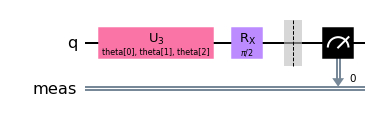

In [31]:
measure_y=QuantumCircuit(1)
measure_y.u3(tq[0],tq[1],tq[2],0)
measure_y.rx(math.pi/2,0)
measure_y.measure_all()
measure_y.draw('mpl')

In [32]:
simplify((abs(Rx_plus*psi)[0])**2-abs((Rx_plus*psi)[1])**2)

sin(phi)*sin(theta)

### Example 7

Given <b> H<b> $=Z_1\otimes Z_2 $ and $|\psi \rangle= \alpha |00\rangle + \beta |01\rangle + \gamma |10\rangle +\delta |11\rangle$

$\langle \psi|$ <b>H<b>$|\psi\rangle=|\alpha|^2 + |\delta|^2 - (|\beta|^2+|\gamma|^2)$

In [33]:
psi4=Matrix([[alpha],[beta],[gamma],[delta]])

In [34]:
H4=TensorProduct(PauliZ,PauliZ)

In [35]:
simplify(Dagger(psi4)*H4*psi4)

Matrix([[alpha*conjugate(alpha) - beta*conjugate(beta) + delta*conjugate(delta) - gamma*conjugate(gamma)]])

### Exercise (from Qosf) :

Use VQE and above concept, find the lowest eigenvalue of the following matrix:

In [36]:
H_q=Matrix([[1,0,0,0],[0,0,-1,0],[0,-1,0,0],[0,0,0,1]])
H_q

Matrix([
[1,  0,  0, 0],
[0,  0, -1, 0],
[0, -1,  0, 0],
[0,  0,  0, 1]])

hint:   
1. Decompose the matrix to the sum of Pauli terms
2. ansatz you can use $(R_x(\theta)\otimes I_1 )(CX_{0,1}) (H_0\otimes I_1) |00 \rangle$
